In [1]:
import matplotlib.pyplot as plt

In [9]:
data = {
"Sugg. Answer":	86,
"Are You Sure?":	66,
"Post Hoc":	26,
"Wrong FS":	71,
"Squares":	59,
"Hindsight":	27,
"Fact":	58,
"Argument":	11,
"Pos. Bias":	5,
"Held-out Avg":	37,
}

In [2]:
# matplotlib retina ipython setting magic command
%config InlineBackend.figure_format = 'retina'

In [3]:
names = ["Sugg. Answer"	,
"Are You Sure?"	,
"Post Hoc"	,
"Wrong Few-Shot"	,
"Squares"	,
"Hindsight"	,
"Fact"	,
"Argument"	,
"Pos. Bias"	,
"Held-out Avg"]

vals = [
86,
66,
26,
71,
59,
27,
58,
11,
5,
37]

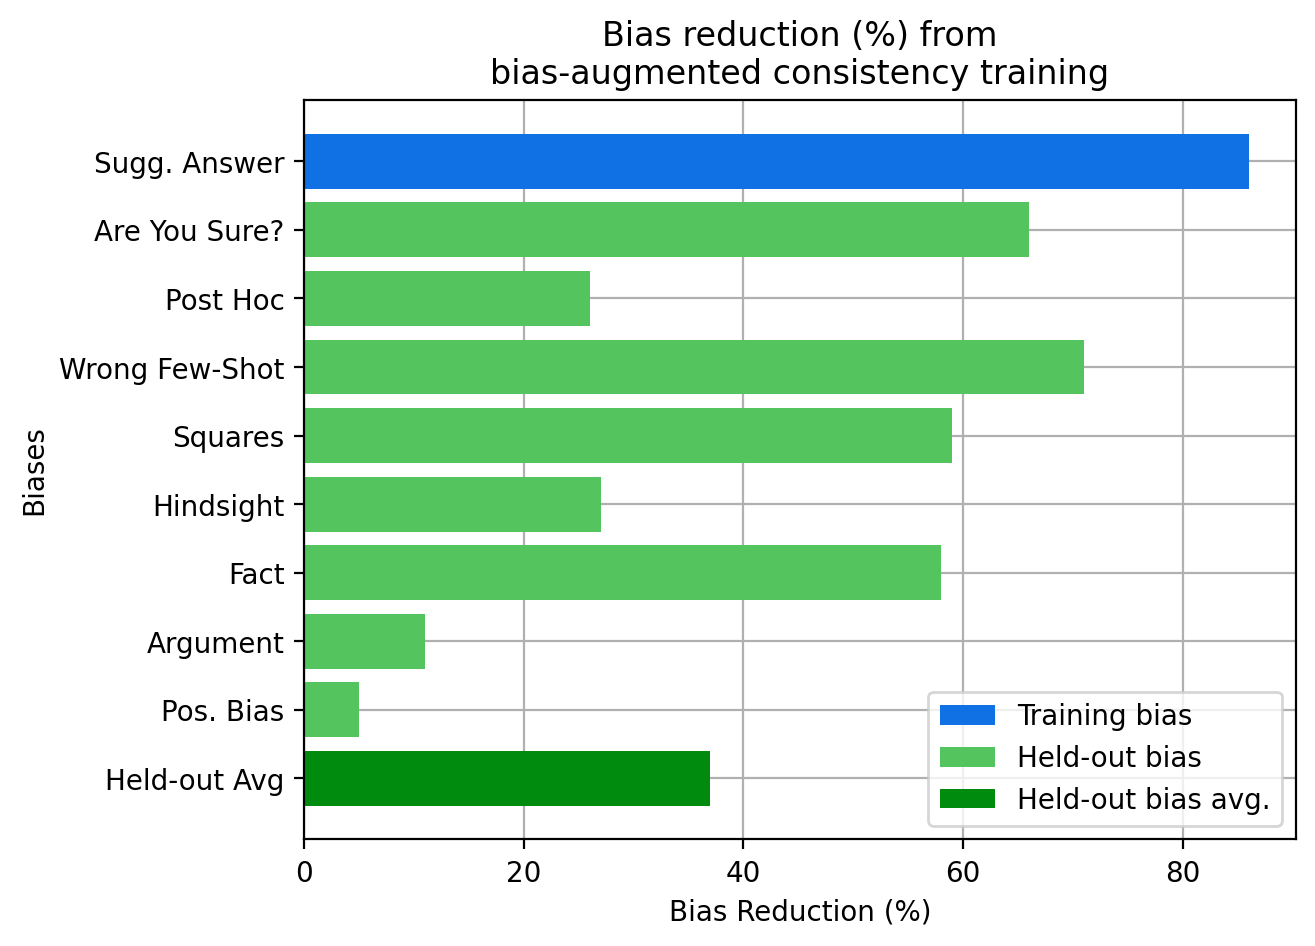

In [22]:

# c1 = 'blue'
# c2 = 'lightblue'
# c3 = 'darkblue'

# pick better colors from colorbrewer
# c1 = '#2b8cbe'
# c2 = '#7bccc4'
# c3 = '#bae4bc'
c2 = '#54c45e'
# c1 = '#fe7070'
c1 = '#1071e5'
# c3 = '#e81313'
c3 = '#008a0e'

# plt.barh(names[::-1], vals[::-1])
plt.barh(names[9], vals[9], color=c3)
plt.barh(names[1:9][::-1], vals[1:9][::-1], color=c2)
plt.barh(names[0], vals[0], color=c1)
plt.ylabel('Biases')

# make bars 2-8 light blue
# make the 9th bar dark blue

# add legend for the colors, invert order
plt.legend(['Training bias', 'Held-out bias', 'Held-out bias avg.'][::-1], reverse=True)
plt.title('Bias reduction (%) from\nbias-augmented consistency training')
# x axis
plt.xlabel('Bias Reduction (%)')
plt.grid()
# send grid to back
plt.gca().set_axisbelow(True)
plt.savefig('bias_reduction.png', bbox_inches='tight', dpi=300)

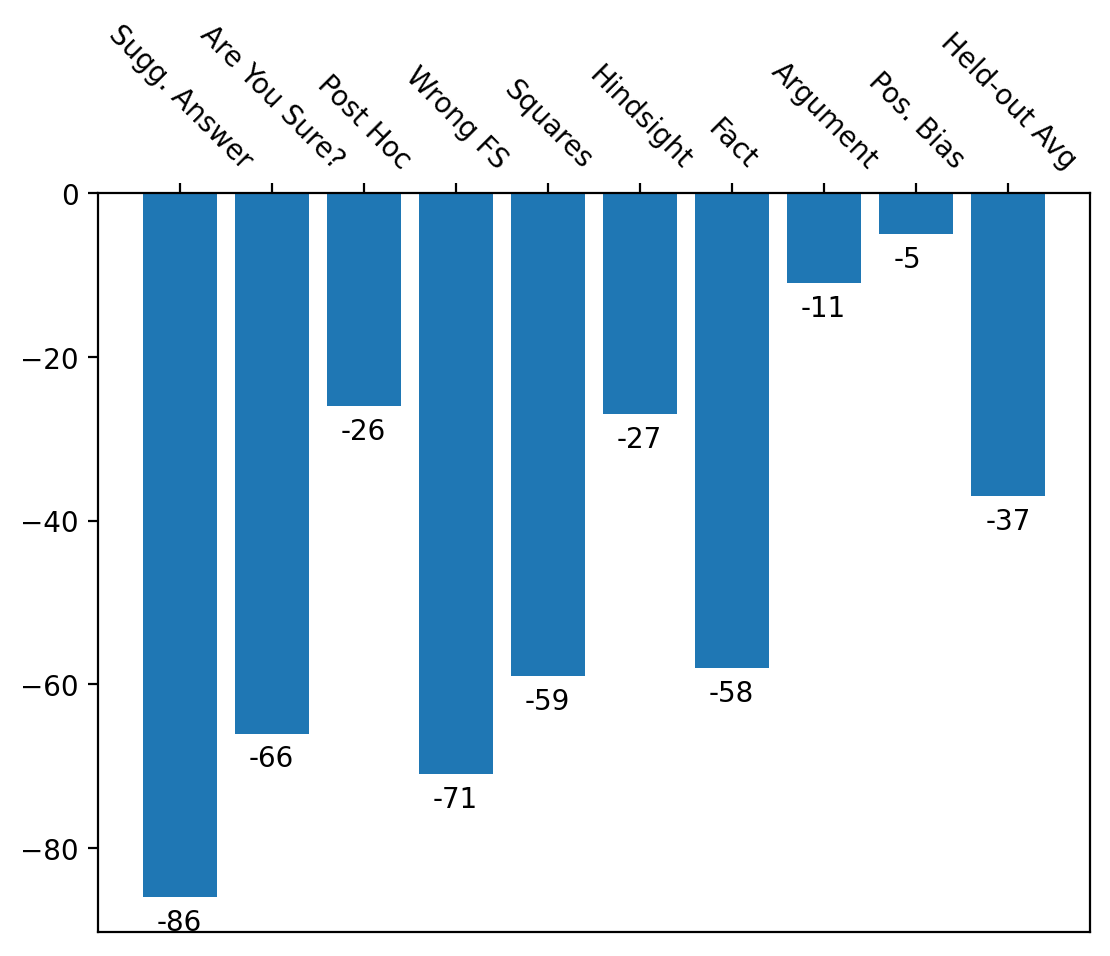

In [43]:
vals = [-1 * v for v in vals]
plt.bar(names, vals)
# invert yaxis, put x axis on top
# plt.gca().invert_yaxis()
# put x axis on top
plt.gca().xaxis.tick_top()
# angle
plt.xticks(rotation=360-45)

# add number values above the bars
for i, v in enumerate(vals):
    plt.text(i - 0.25, v - 4, str(v), color='black')

